In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [3]:
spark = SparkSession.builder.appName("Athletic Events").getOrCreate()

In [25]:
df = spark.read.csv("file:///home/hduser/demo_1/athlete_events.csv",sep=',', inferSchema=True,header=True)

In [26]:
df.show(5)

+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+---------+-------------+--------------------+-----+
| ID|                Name|Sex|Age|Height|Weight|          Team|NOC|      Games|Year|Season|     City|        Sport|               Event|Medal|
+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+---------+-------------+--------------------+-----+
|  1|           A Dijiang|  M| 24|   180|    80|         China|CHN|1992 Summer|1992|Summer|Barcelona|   Basketball|Basketball Men's ...|   NA|
|  2|            A Lamusi|  M| 23|   170|    60|         China|CHN|2012 Summer|2012|Summer|   London|         Judo|Judo Men's Extra-...|   NA|
|  3| Gunnar Nielsen Aaby|  M| 24|    NA|    NA|       Denmark|DEN|1920 Summer|1920|Summer|Antwerpen|     Football|Football Men's Fo...|   NA|
|  4|Edgar Lindenau Aabye|  M| 34|    NA|    NA|Denmark/Sweden|DEN|1900 Summer|1900|Summer|    Paris|   Tug-Of-War|Tug-Of-War Men's ...| Gold|

In [27]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [28]:
df.count()

271116

In [29]:
len(df.columns)

15

In [30]:
# df = df.drop('City')

In [31]:
df = df.dropDuplicates()

In [32]:
df.count()

269729

In [33]:
# Type casting (String to int)
df_final = df.withColumn("Age",col("Age").cast("Integer")) \
             .withColumn("Height",col("Height").cast("Integer")) \
             .withColumn("Weight",col("Weight").cast("Integer"))

In [34]:
df_final.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [35]:
df_final.createOrReplaceTempView("ath_eve")

In [46]:
# Display Distribution of the age of gold medalists
q1 = spark.sql("Select Age, count(Medal) as Total_Medals from ath_eve where Medal= 'Gold' and Age > 0 group by Age order by Age asc")
q1.show()

+---+------------+
|Age|Total_Medals|
+---+------------+
| 13|           7|
| 14|          27|
| 15|          75|
| 16|         113|
| 17|         189|
| 18|         278|
| 19|         457|
| 20|         666|
| 21|         910|
| 22|        1087|
| 23|        1126|
| 24|        1125|
| 25|        1045|
| 26|         970|
| 27|         859|
| 28|         797|
| 29|         647|
| 30|         523|
| 31|         395|
| 32|         354|
+---+------------+
only showing top 20 rows



In [47]:
q1 = q1.toPandas()

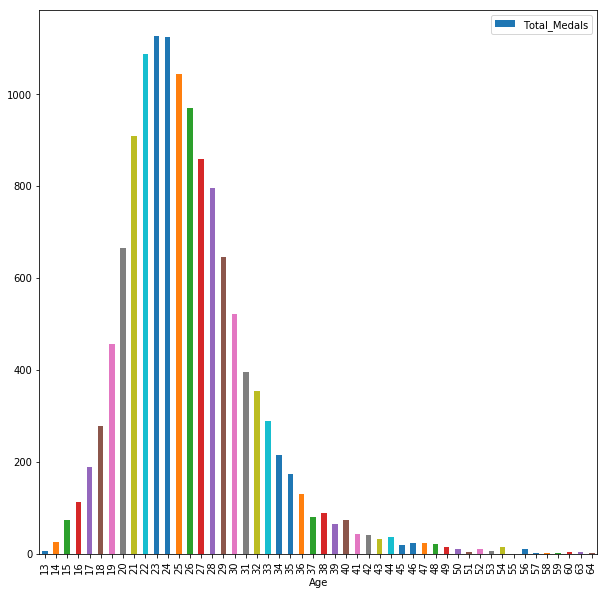

In [50]:
q1.plot(kind='bar',x='Age',y='Total_Medals', figsize=(10,10))

In [44]:
# Gold Medals for Athletes Over age 50 based on Sports
spark.sql("select Sport, count(Medal) as Total_medals from ath_eve where Age>50 and Medal = 'Gold' group by Sport order by Total_medals desc").show()

+----------------+------------+
|           Sport|Total_medals|
+----------------+------------+
|   Equestrianism|          18|
|         Sailing|          12|
|        Shooting|          11|
|         Archery|          11|
|Art Competitions|           8|
|         Curling|           2|
|        Alpinism|           1|
|         Croquet|           1|
|           Roque|           1|
+----------------+------------+

